Jupyter Notebook example
========================

Creating a cube
---------------

This example will create a **500x500** pixels cube with the 12-bands images
from **S-PLUS TILE HYDRA-0045** for the *NGC3312* galaxy. The stamps are made
from a cropped 500x500 pixels area located at **S-PLUS TILE** mentioned before,
centered at coordinates RA *10h37m02.5s* and DEC *-27d33’56"*.

![NGC3312 crop at HYDRA-0045 S-PLUS tile](HYDRA-0045_NGC3312-stamp.png)

The ``scubes`` entry-point script will download the 12-band stamps
and calculate the fluxes and errors of each image. The images are 
zero-point calibrated based on the **S-PLUS iDR4** (*scubes package 
includes zp data*) values, but they are **not corrected for Galactic 
extinction**. The resultant files will be created at directory *workdir*.

The program also could use **SExtractor** in order to create a spatial mask of
stars, attempting to remove the areas enclosed by the brightest ones
along the FOV (*-M* optional argument). To use this option, do not forget 
to include the **SExtractor** executable path using the option *-x*. An example
of this usage could be find at: xxx

``scubes`` entry-point script help and usage:

In [1]:
!scubes --help

usage: scubes [-h] [-r] [-c] [-f] [-b BANDS [BANDS ...]] [-l SIZE] [-N]
              [-w WORK_DIR] [-o OUTPUT_DIR] [-x SEXTRACTOR] [-p CLASS_STAR]
              [-v] [-D] [-S SATUR_LEVEL] [-Z ZPCORR_DIR] [-z ZP_TABLE]
              [-B BACK_SIZE] [-T DETECT_THRESH] [-U USERNAME] [-P PASSWORD]
              [-M] [-I] [-F] [-R] [--version]
              SPLUS_TILE RA DEC GALAXY_NAME

┌─┐   ┌─┐┬ ┬┌┐ ┌─┐┌─┐  | Create S-PLUS galaxies data cubes, a.k.a. S-CUBES. 
└─┐───│  │ │├┴┐├┤ └─┐  | S-CUBES is an organized FITS file with data, errors, 
└─┘   └─┘└─┘└─┘└─┘└─┘  | mask and metadata about some galaxy present on any 
---------------------- + S-PLUS observed tile. Any problem contact:

   Eduardo Alberto Duarte Lacerda <dhubax@gmail.com>, Fabio Herpich <fabiorafaelh@gmail.com>

The input values of RA and DEC will be converted to degrees using the 
scubes.utilities.io.convert_coord_to_degrees(). All scripts with RA 
and DEC inputs parse angles in two different units:

- **hourangle**: using *h

The call to the entry-point script ``scubes`` to this example would be:

*Do not forget to change YOURUSER and YOURPASS for your credentials at S-PLUS Cloud.*

In [2]:
!scubes -fR -w . -U YOURUSER -P YOURPASS -l 500 -- HYDRA-0045 10h37m02.5s -27d33\'56\" NGC3312

NGC3312 @ HYDRA-0045 - downloading: 100%|███████| 12/12 [00:31<00:00,  2.58s/it]
[2024-05-26T21:02:51.173895] - scubes: Reading ZPs table: /home/lacerda/.local/lib/python3.10/site-packages/scubes/data/iDR4_zero-points.csv
[2024-05-26T21:02:51.178052] - scubes: Getting ZP corrections for the S-PLUS bands...
[2024-05-26T21:02:51.182251] - scubes: Calibrating stamps...
/home/lacerda/.local/lib/python3.10/site-packages/scubes/core.py:523: RuntimeWarning: cdelt will be ignored since cd is present
  nw.wcs.cdelt[:2] = w.wcs.cdelt
[2024-05-26T21:02:51.947784] - scubes: Cube successfully created!
[2024-05-26T21:02:51.947802] - scubes: Removing downloaded data


How to read a cube
------------------

A cube resultant from ``scubes`` script is stored using FITS format 
and is called **SCUBE**. In order to help the *user*, ``scubes`` 
package implements a utility class to read the **SCUBE**. This class
implements the method ``lRGB_image()`` to create Lupton RGB images.

Below an example of the ``scubes.utilities.read_scube()`` usage:

In [3]:
from os.path import join
from scubes.utilities.readscube import read_scube

SNAME = f'NGC3312'
filename = join(SNAME, f'{SNAME}_cube.fits')

scube = read_scube(filename)

Headers
-------

The *PRIMARY HEADER* (``scube.primary_header``) contains information 
about the object, all processed by the code. The *DATA HEADER* 
(``scube.data_header``) otherwise, includes information about the
tile observation and a 3D World Coordinate System (WCS) information, which 
is converted to a 2D ``astropy.wcs.WCS()`` instance in the variable 
``scube.wcs``. 

In [4]:
scube.primary_header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TILE    = 'HYDRA-0045'                                                          
GALAXY  = 'NGC3312 '                                                            
SIZE    =                  500 / Side of the stamp in pixels                    
X0TILE  =             5683.973                                                  
Y0TILE  =             8849.952                                                  
RA      =   159.26041666666666                                                  
DEC     =  -27.565555555555555                                                  

In [5]:
scube.data_header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  500                                                  
NAXIS2  =                  500                                                  
NAXIS3  =                   12                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
EQUINOX =        2000.00000000 / Mean equinox                                   
MJD-OBS =   5.780300000000E+04 / [d] MJD of observation                         
RADESYS = 'ICRS    '        

2D WCS instance:

In [6]:
scube.wcs

/home/lacerda/.local/lib/python3.10/site-packages/astropy/wcs/wcs.py:3137: RuntimeWarning: cdelt will be ignored since cd is present
  description.append(s.format(*self.wcs.cdelt))


WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 159.292035417  -28.0772674167  
CRPIX : 68.5  -3097.5  
PC1_1 PC1_2  : -0.0001527777777778  0.0  
PC2_1 PC2_2  : 0.0  0.0001527777777778  
CDELT : 1.0  1.0  
NAXIS : 500  500  12

Filters information
-------------------

``scubes`` includes some information about the filters used to obtain
S-PLUS images. The script is called ``scubes_filters`` and the data
is obtained from [S-PLUS Filters Transmission Curve Calculator](https://github.com/splus-collab/splus_filters>),
made by Fabio Herpich.

In [7]:
!scubes_filters --decimals 2

filter central_wave delta_wave trapz_wave trapz_width mean_wave mean_width mean_1_wave mean_1_width pivot_wave alambda_av
------ ------------ ---------- ---------- ----------- --------- ---------- ----------- ------------ ---------- ----------
 uJAVA      3576.59     324.89    3542.14      322.83   3542.14     322.83     3541.97       322.48    3533.28       1.61
 J0378      3770.67     150.99    3774.01      135.96   3774.01     135.96     3773.98       135.75    3773.16       1.52
 J0395      3940.67      102.8    3941.09      100.78   3941.09     100.78     3941.07       100.66     3940.7       1.46
 J0410      4094.08     200.31    4096.24      193.35   4096.24     193.35     4096.21       193.12    4094.93        1.4
 J0430      4292.02     200.16    4293.38      195.07   4293.38     195.07     4293.34       194.82    4292.11       1.33
 gSDSS      4774.03    1505.46     4821.1     1312.44    4821.1    1312.44     4821.07      1312.17    4758.49        1.2
 J0515      5132.82     

The class ``scube`` also makes available some information about the 
filters, such as:

    scube.filters: filters names
    scube.pivot_wave: pivot wavelenghts
    scube.central_wave: central wavelenghts
    

In [8]:
for _f, _p, _c in zip(scube.filters, scube.pivot_wave, scube.central_wave):
    print(f'filter: {_f} wave(pivot, central): ({_p:.2f}, {_c:.2f})')

filter: uJAVA wave(pivot, central): (3533.28, 3576.59)
filter: J0378 wave(pivot, central): (3773.16, 3770.67)
filter: J0395 wave(pivot, central): (3940.70, 3940.67)
filter: J0410 wave(pivot, central): (4094.93, 4094.08)
filter: J0430 wave(pivot, central): (4292.11, 4292.02)
filter: gSDSS wave(pivot, central): (4758.49, 4774.03)
filter: J0515 wave(pivot, central): (5133.13, 5132.82)
filter: rSDSS wave(pivot, central): (6251.83, 6274.74)
filter: J0660 wave(pivot, central): (6613.88, 6613.99)
filter: iSDSS wave(pivot, central): (7670.61, 7702.50)
filter: J0861 wave(pivot, central): (8607.25, 8611.48)
filter: zSDSS wave(pivot, central): (8941.48, 8881.70)


More metadata about the **SCUBE** cube, such as the *exposure times, 
gains, PSF FWHM and the date of the observation* can be found with 
``scube.metadata``:

In [9]:
scube.metadata

FITS_rec([('uJAVA', 3576.5900319 , 3533.28150603, 1302.99580147, 2651.74575679, 1.4238565 , '2017-02-19'),
          ('J0378', 3770.66765668, 3773.16495619, 1266.43687077, 2590.53003934, 1.24601953, '2017-02-19'),
          ('J0395', 3940.66900669, 3940.69812172,  680.64843148, 1401.35102734, 1.18031096, '2017-02-19'),
          ('J0410', 4094.0795908 , 4094.92800733,  345.42806559,  706.83367717, 1.13351701, '2017-02-19'),
          ('J0430', 4292.0201202 , 4292.10579006,  278.90845694,  570.57617371, 1.14671147, '2017-02-19'),
          ('gSDSS', 4774.02604026, 4758.4878587 ,  191.4341835 ,  370.91141421, 1.2285185 , '2017-02-19'),
          ('J0515', 5132.82097321, 5133.13247975,  299.46581613,  610.78047227, 1.10798045, '2017-02-19'),
          ('rSDSS', 6274.74334743, 6251.83097429,  195.74024342,  396.72506048, 1.09843247, '2017-02-19'),
          ('J0660', 6613.99318993, 6613.87556039, 1430.33833785, 2904.99319306, 1.07404553, '2017-02-19'),
          ('iSDSS', 7702.49932499, 76

Images plot
-----------

This example below plots the images of the magnitudes and errors from 
all filters, calculated by ``scubes`` package. The of the flux and errors
by default are in erg/s/$\unicode{x212B}$/cm$^2$:

    scube.flux__lyx and scube.eflux__lyx

the `lyx` suffix points the dimensions of the array (Lambda, Y, X).
``scube`` class also create arrays with the value converted to 
mag/arcsec/pix$^2$:

    scube.mag__lyx and scube.emag__lyx


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Text(0.5, 0.98, 'mag/arcsec/pix$^2$')

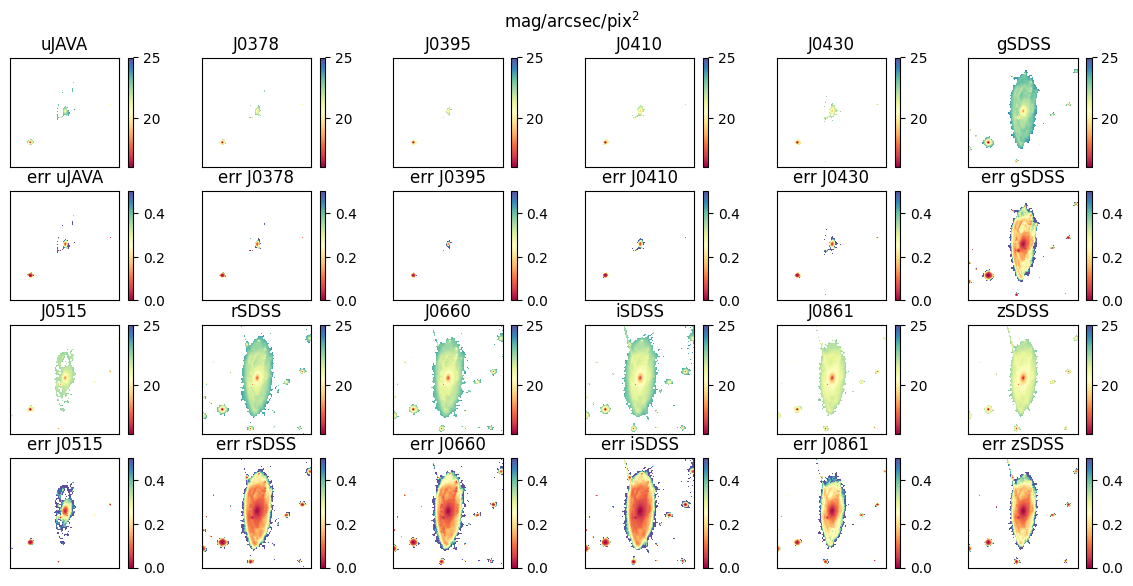

In [11]:
f__byx = scube.mag__lyx
ef__byx = scube.emag__lyx
weimask__yx = scube.weimask__yx
filters_names = scube.metadata['FILTER']
nb, ny, nx = f__byx.shape
nrows = 2
ncols = int(nb/nrows)
f, ax_arr = plt.subplots(2*nrows, ncols)
f.set_size_inches(12, 6)
f.subplots_adjust(left=0.01, right=0.95, bottom=0.05, top=0.90, hspace=0.22, wspace=0.13)
k = 0
for ir in range(nrows):
    for ic in range(ncols):
        img = f__byx[k]
        vmin, vmax = 16, 25
        ax = ax_arr[ir*2, ic]
        ax.set_title(filters_names[k])
        im = ax.imshow(img, origin='lower', cmap='Spectral', vmin=vmin, vmax=vmax)
        plt.colorbar(im, ax=ax)
        ax.xaxis.set_major_locator(ticker.NullLocator())
        ax.yaxis.set_major_locator(ticker.NullLocator())

        eimg = ef__byx[k]
        vmin, vmax = 0, 0.5
        ax = ax_arr[ir*2 + 1, ic]
        ax.set_title(f'err {filters_names[k]}')
        im = ax.imshow(eimg, origin='lower', cmap='Spectral', vmin=vmin, vmax=vmax)
        plt.colorbar(im, ax=ax)
        ax.xaxis.set_major_locator(ticker.NullLocator())
        ax.yaxis.set_major_locator(ticker.NullLocator())

        k += 1
f.suptitle(r'mag/arcsec/pix$^2$')

Text(0.5, 0.98, '$\\log_{10}$ 10$^{18}$erg/s/$\\AA$/cm$^2$')

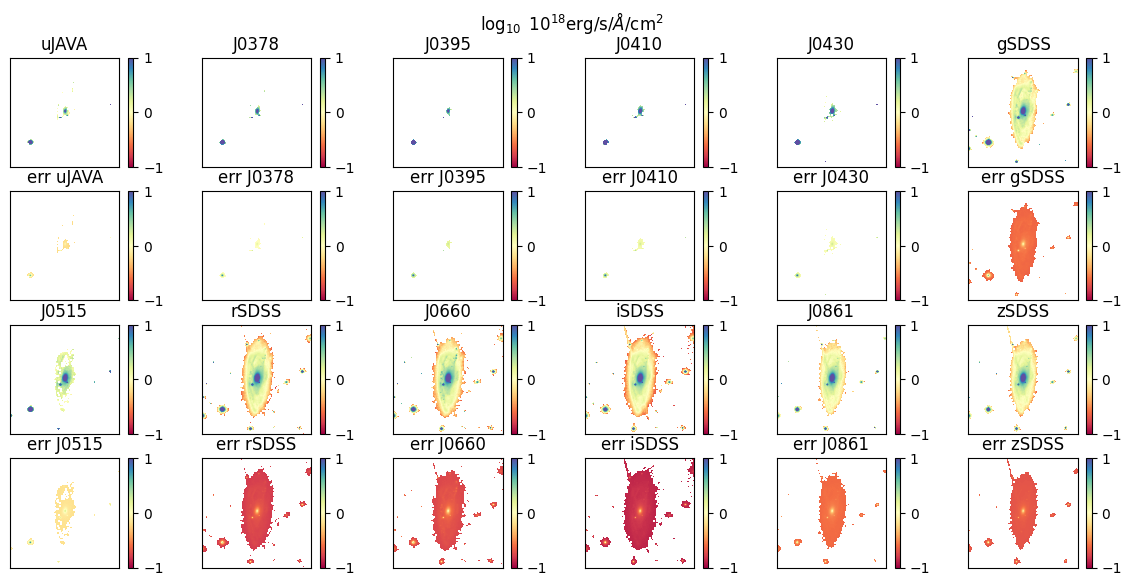

In [12]:
f__byx = np.ma.log10(scube.flux__lyx) + 18
ef__byx = np.ma.log10(scube.eflux__lyx) + 18
weimask__yx = scube.weimask__yx
filters_names = scube.metadata['FILTER']
nb, ny, nx = f__byx.shape
nrows = 2
ncols = int(nb/nrows)
f, ax_arr = plt.subplots(2*nrows, ncols)
f.set_size_inches(12, 6)
f.subplots_adjust(left=0.01, right=0.95, bottom=0.05, top=0.90, hspace=0.22, wspace=0.13)
k = 0
for ir in range(nrows):
    for ic in range(ncols):
        img = f__byx[k]
        vmin, vmax = np.percentile(img.compressed(), [5, 95])
        vmin, vmax = -1, 1
        ax = ax_arr[ir*2, ic]
        ax.set_title(filters_names[k])
        im = ax.imshow(img, origin='lower', cmap='Spectral', vmin=vmin, vmax=vmax)
        plt.colorbar(im, ax=ax)
        ax.xaxis.set_major_locator(ticker.NullLocator())
        ax.yaxis.set_major_locator(ticker.NullLocator())
        eimg = ef__byx[k]
        vmin, vmax = np.percentile(eimg.compressed(), [5, 95])
        vmin, vmax = -1, 1
        ax = ax_arr[ir*2 + 1, ic]
        ax.set_title(f'err {filters_names[k]}')
        im = ax.imshow(eimg, origin='lower', cmap='Spectral', vmin=vmin, vmax=vmax)
        plt.colorbar(im, ax=ax)
        ax.xaxis.set_major_locator(ticker.NullLocator())
        ax.yaxis.set_major_locator(ticker.NullLocator())

        k += 1
f.suptitle(r'$\log_{10}$ 10$^{18}$erg/s/$\AA$/cm$^2$')

3D image
--------

FOV: 140.0 deg
focal lenght: 0.36397023426620245


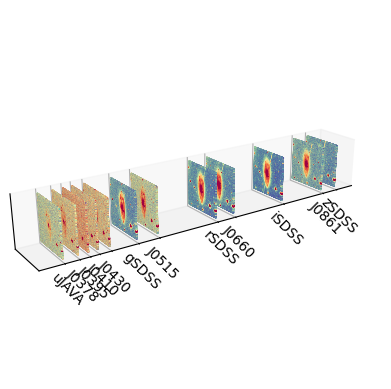

In [13]:
import astropy.units as u

xx, yy = np.meshgrid(range(scube.size), range(scube.size))
FOV = 140*u.deg
focal_lenght = 1/np.tan(FOV/2)
print(f'FOV: {FOV}\nfocal lenght: {focal_lenght}')
f = plt.figure()
ax = f.add_subplot(projection='3d')
for i, _w in enumerate(scube.pivot_wave):
    sc = ax.scatter(xx, yy, c=np.ma.log10(scube.flux__lyx[i]) + 18, 
                    zs=_w, s=1, edgecolor='none', vmin=-1, vmax=0.5, cmap='Spectral_r')
ax.set_zticks(scube.pivot_wave)
ax.set_zticklabels(scube.filters, rotation=-45)
ax.set_proj_type('persp', focal_length=focal_lenght)
ax.set_box_aspect(aspect=(7, 1, 1))
ax.view_init(elev=20, azim=-125, vertical_axis='y')
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)

RGB and Filters plot
--------------------

This series of examples below are using the Lupton RGB method of the 
``scube`` module and some of the **data** stored by the ``scubes`` 
package in order to create a filters transmittance plot.

``scubes`` package implements various constants in ``scubes.constants``
module. This example below uses ``FILTER_NAMES_FITS``, ``FILTERS_COLORS`` 
and ``FILTER_TRANSMITTANCE`` data. The filters transmittance curves are 
calculated by ``splus-filters`` package:

* https://github.com/splus-collab/splus_filters

The ``scubes.utilities.read_scube.lRGB_image`` is a wrapper to 
``astropy.visualization.make_lupton_rgb()`` that creates RGB images 
using the **SCUBE** instantiated by ``scubes.utilities.read_scube``
class.

Text(0.5, 1.0, 'new_B=2B')

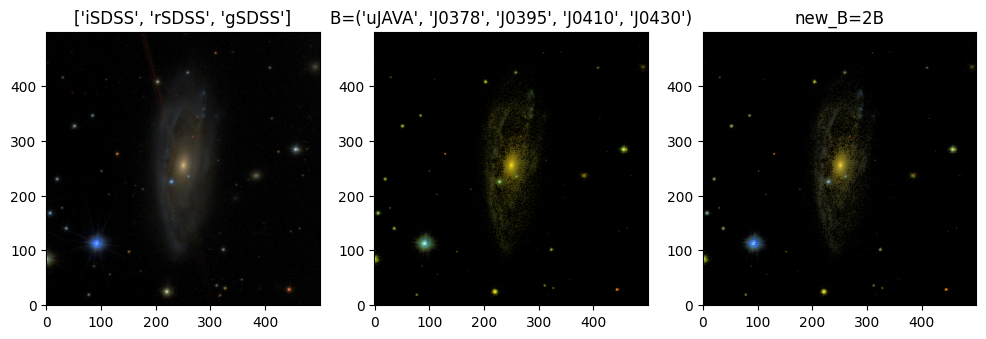

In [14]:
# RGB plot
rgb_f = [1, 1, 1]
pminmax = [5, 95]
Q = 10
stretch = 5
im_max = 1
minimum = (0, 0, 0)

f, axArr = plt.subplots(1, 3)
ax1, ax2, ax3 = axArr
f.set_size_inches(12, 4)

###### original RGB from splus.data package
rgb = ['iSDSS', 'rSDSS', 'gSDSS']
rgb__yxb = scube.lRGB_image(rgb, rgb_f, pminmax, Q=Q, stretch=stretch, im_max=im_max, minimum=minimum)
ax1.imshow(rgb__yxb, origin='lower')
ax1.set_title(rgb)

###### improved RGB
R_filters = 'iSDSS'
G_filters = 'rSDSS'
B_filters = tuple(scube.filters[0:5])
rgb = [R_filters, G_filters, B_filters]
rgb__yxb = scube.lRGB_image(rgb, rgb_f, pminmax, Q=Q, stretch=stretch, im_max=im_max, minimum=minimum)
ax2.imshow(rgb__yxb, origin='lower')
ax2.set_title(f'B={B_filters}')

###### improved RGB with contrast
rgb_f = [1, 1, 2]
R_filters = 'iSDSS'
G_filters = 'rSDSS'
B_filters = tuple(scube.filters[0:5])
rgb = [R_filters, G_filters, B_filters]
rgb__yxb = scube.lRGB_image(rgb, rgb_f, pminmax, Q=Q, stretch=stretch, im_max=im_max, minimum=minimum)
ax3.imshow(rgb__yxb, origin='lower')
ax3.set_title('new_B=2B')

Text(0, 0.5, '${\\rm R}_\\lambda\\ [\\%]$')

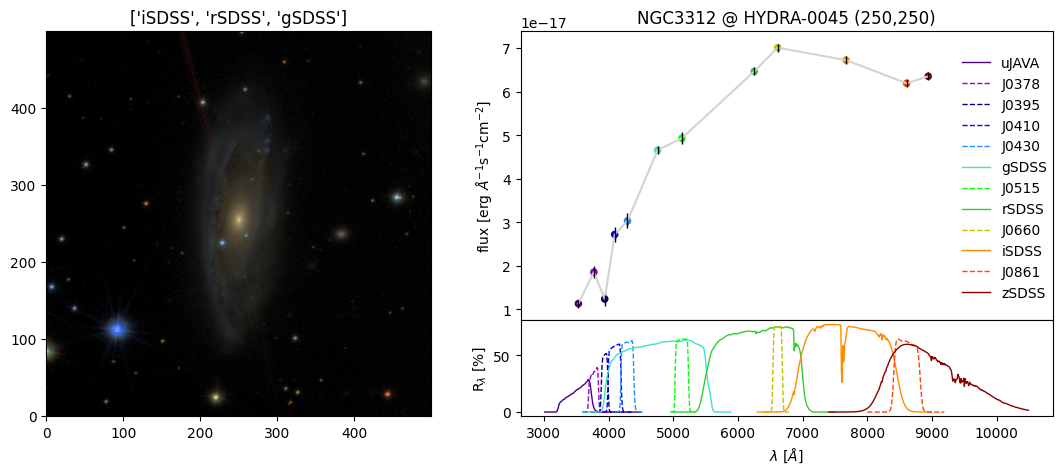

In [19]:
from matplotlib.gridspec import GridSpec

from scubes.constants import FILTER_NAMES_FITS, FILTER_COLORS, FILTER_TRANSMITTANCE

# central coords
i_x0, i_y0 = scube.i_x0, scube.i_y0
spec_pix_y, spec_pix_x = i_y0, i_x0

# data
logflux__l = np.ma.log10(scube.flux__lyx[:, i_y0, i_x0])  #.sum(axis=(1, 2)))
logeflux__l = np.ma.log10(scube.eflux__lyx[:, i_y0, i_x0])
flux__l = scube.flux__lyx[:, i_y0, i_x0]
eflux__l = scube.eflux__lyx[:, i_y0, i_x0]
bands__l = scube.pivot_wave

# plot
nrows = 4
ncols = 2
f = plt.figure()
f.set_size_inches(12, 5)
f.subplots_adjust(left=0, right=0.9)
gs = GridSpec(nrows=nrows, ncols=ncols, hspace=0, wspace=0.03, figure=f)
ax = f.add_subplot(gs[0:nrows - 1, 1])
axf = f.add_subplot(gs[-1, 1])
axrgb = f.add_subplot(gs[:, 0])

# RGB image
rgb = ['iSDSS', 'rSDSS', 'gSDSS']
rgb__yxb = scube.lRGB_image(
    rgb=rgb, rgb_f=[1, 1, 1], 
    pminmax=[5, 95], Q=10, stretch=5, im_max=1, minimum=(0, 0, 0)
)
axrgb.imshow(rgb__yxb, origin='lower')
axrgb.set_title(rgb)

# filters transmittance
filter_colors = []
axf.sharex(ax)
for k in scube.filters:
    _f = FILTER_TRANSMITTANCE[k]
    c = FILTER_COLORS[FILTER_NAMES_FITS[k]]
    filter_colors.append(c)
    lt = '--'
    if 'JAVA' in k or 'SDSS' in k:
        lt = '-'
    axf.plot(_f['wavelength'], _f['transmittance'], c=c, lw=1, ls=lt, label=k)
axf.legend(loc=(0.82, 1.15), frameon=False)

# spectrum 
ax.set_title(f'{scube.galaxy} @ {scube.tile} ({spec_pix_x},{spec_pix_y})')
ax.errorbar(x=bands__l,y=flux__l, yerr=eflux__l, c='k', lw=1, fmt='|')
ax.plot(bands__l, flux__l, '-', c='lightgray')
ax.scatter(bands__l, flux__l, c=np.array(filter_colors), s=20)

ax.set_xlabel(r'$\lambda_{\rm pivot}\ [\AA]$', fontsize=10)
ax.set_ylabel(r'flux $[{\rm erg}\ \AA^{-1}{\rm s}^{-1}{\rm cm}^{-2}]$', fontsize=10)
axf.set_xlabel(r'$\lambda\ [\AA]$', fontsize=10)
axf.set_ylabel(r'${\rm R}_\lambda\ [\%]$', fontsize=10)

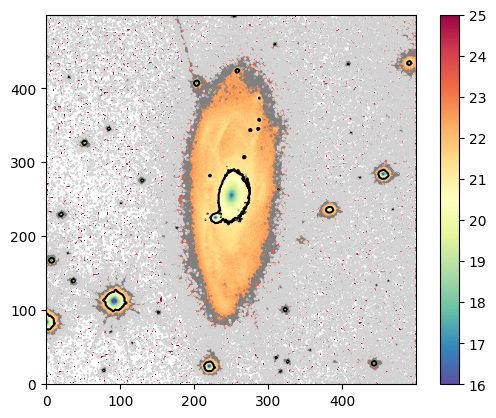

In [16]:
# Contour plot example
i_lambda = scube.filters.index('rSDSS')
image__yx = scube.mag__lyx[i_lambda]
contour_levels = [21, 23, 24]

f = plt.figure()
im = plt.imshow(image__yx, cmap='Spectral_r', origin='lower', vmin=16, vmax=25)
plt.contour(image__yx, levels=[21, 23, 24], colors=['k', 'gray', 'lightgray'])
plt.colorbar(im)

Distance from center
--------------------

With ``scube.pixel_distance__yx`` property, the user also can play with
distance masks, such as create integrated spectra. An example:

Text(0.5, 1.0, 'int. area. spectrum')

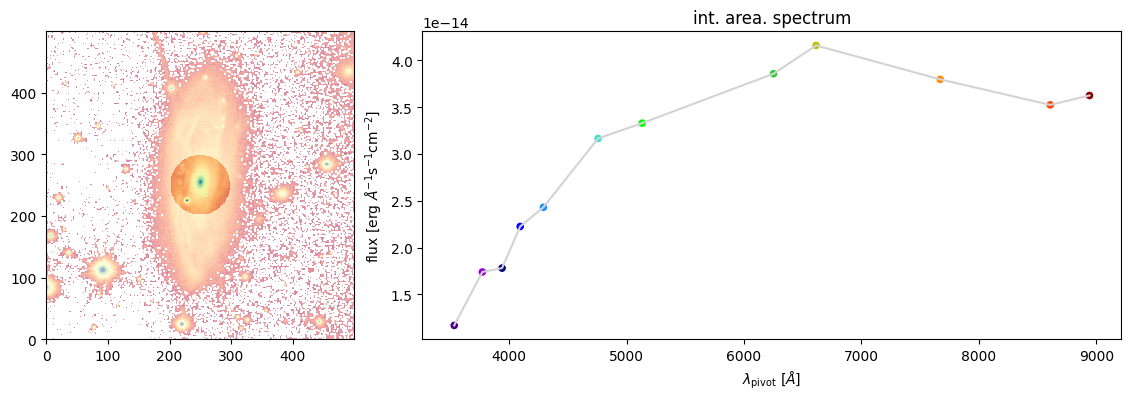

In [18]:
from matplotlib.gridspec import GridSpec

max_dist = 50  # pixels
mask__yx = scube.pixel_distance__yx > max_dist
__lyx = (scube.n_filters, scube.ny, scube.nx)
mask__lyx = np.broadcast_to(mask__yx, __lyx)
integrated_flux__lyx = np.ma.masked_array(scube.flux__lyx, mask=mask__lyx, copy=True)

f = plt.figure()
f.set_size_inches(12, 4)
f.subplots_adjust(left=0, right=0.9)
gs = GridSpec(nrows=1, ncols=3, wspace=0.2, figure=f)
ax = f.add_subplot(gs[1:])
axmask = f.add_subplot(gs[0])
img__yx = np.ma.masked_array(scube.mag__lyx[scube.filters.index('rSDSS')], mask=mask__yx, copy=True)
im = axmask.imshow(img__yx, origin='lower', cmap='Spectral_r')
axmask.imshow(scube.mag__lyx[scube.filters.index('rSDSS')], origin='lower', cmap='Spectral_r', alpha=0.5, vmin=16, vmax=25)
bands__l = scube.pivot_wave
flux__l = integrated_flux__lyx.sum(axis=(1,2))
ax.plot(bands__l, flux__l, '-', c='lightgray')
ax.scatter(bands__l, flux__l, c=np.array(filter_colors), s=20, label='')
ax.set_xlabel(r'$\lambda_{\rm pivot}\ [\AA]$', fontsize=10)
ax.set_ylabel(r'flux $[{\rm erg}\ \AA^{-1}{\rm s}^{-1}{\rm cm}^{-2}]$', fontsize=10)
ax.set_title('int. area. spectrum')